## DETERMINAR CANTIDAD DE DATOS FALTANTES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from warnings import simplefilter
simplefilter(action="ignore", category=RuntimeWarning)
simplefilter(action="ignore", category=FutureWarning)

In [3]:
'''lista de archivos a leer'''
lis_arch = ['obs_diario_pp.csv','obs_diario_tmax.csv','obs_diario_tmin.csv','obs_diario_tmed.csv',
            'obs_diario_hmed.csv']
nom = ['precipitacion','temp_max','temp_min','temp_med','hum_med']
'''Se crea un data frame vacío para almacenar los resúmenes de todas las variables '''
temp = pd.read_csv('../datos/1.0.variables/obs_diario_pp.csv', sep=',')


In [7]:
'''Datos faltantes respecto a una variable'''
def revisar_null(data):
    data = data.drop(columns='fecha', axis=0)
    data = data.isnull()
    return data

def sacar_var(nombre):
    if (nombre.count('pp')>0): return 'precipitación'
    elif (nombre.count('tmax')>0): return 'temperatura máxima'
    elif (nombre.count('tmin')>0): return 'temperatura mínima'
    elif (nombre.count('tmed')>0): return 'temperatura media'
    else: return 'humedad relativa media'

'''Gráfica de Datos faltantes respecto a una variable'''
def graficar_null(archivo):
    variable = sacar_var(archivo)
    datos = pd.read_csv('../datos/1.0.variables/'+archivo, sep=',')
    dato_rev = revisar_null(datos)
    fig =plt.figure(figsize=(10,5))
    ax = plt.gca()
    sns.heatmap(dato_rev,ax=ax,cbar=False)
    plt.tick_params(labelleft=True, left=True)
    titulo = "Datos faltantes de "+variable
    plt.xlabel("Estación", color='black', weight='bold', size = 15, labelpad = 6)
    plt.ylabel("Datos faltantes", color='black', weight='bold', size = 15, labelpad = 6)
    plt.title(titulo.upper(), color='darkblue', weight='bold', size = 20)
    plt.xticks(rotation = 45, size = 14)
    plt.yticks(size = 10)
    '''Los valores claros indican datos faltantes de precipitación'''    


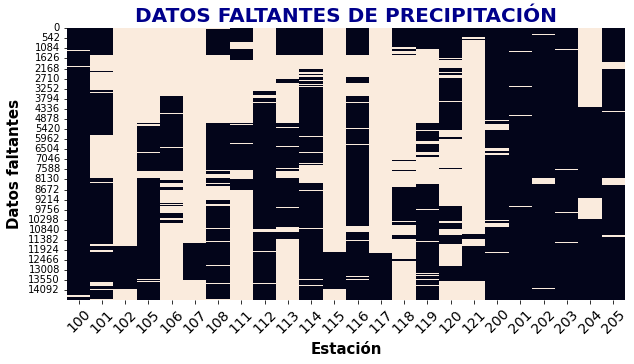

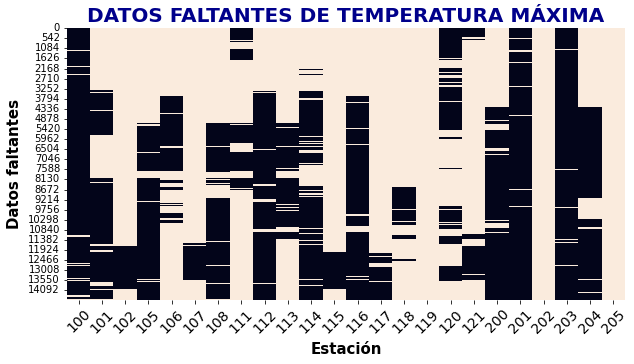

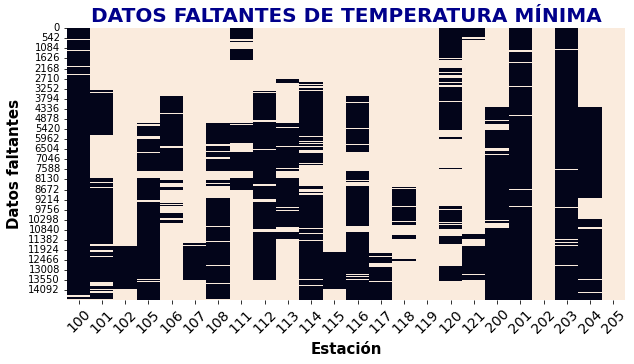

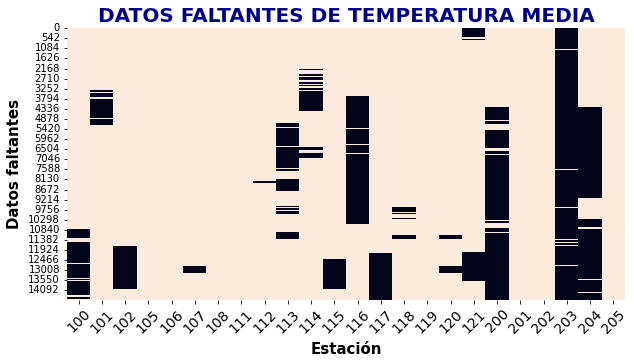

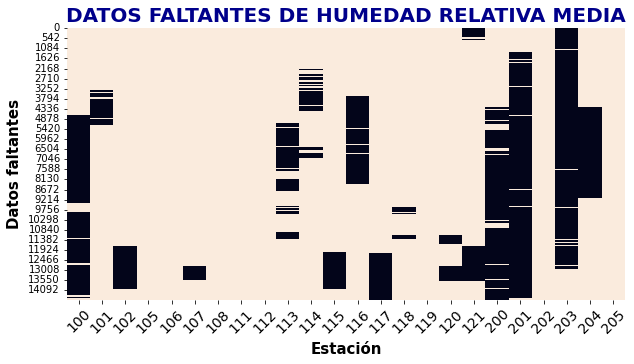

In [8]:
for archivo in lis_arch:
    graficar_null(archivo)

In [6]:
sel =pd.DataFrame(columns=temp.columns)
sel.rename(columns = {'fecha':'variable'}, inplace = True)

'''Se define una fecha de inicio y una fecha de finalización'''
ini ='1981-01-01'
fin ='2020-12-31'
for p in lis_arch:
    pin ='../datos/1.0.variables/' + p
    df = pd.read_csv(pin, sep=',')
    '''Establecer rango de fechas'''
    df['fecha']=pd.to_datetime(df['fecha'])
    df=df[(df['fecha']>=ini) & (df['fecha']<fin)]
    total = df.shape[0]
    nulos = (df.isnull().sum()) * 100 / total
    sel = sel.append([nulos], ignore_index=True)    
sel = sel.assign(variable=nom)
sel.drop(columns='fecha', axis=0, inplace = True)
sel=sel.T
sel.columns=sel.iloc[0,:]
sel.drop('variable', axis=0, inplace=True)
sel=sel.reset_index()
sel.rename(columns = {'index':'ID'}, inplace = True)
df=pd.read_csv('../datos/1.0.Estaciones/estaciones_senamhi_generado.csv', sep=',')
sel['estacion']=df['estacion'].astype(str)
nulos=sel[(sel['precipitacion']>=0) & (sel['precipitacion']<=10)]
nulos=nulos.sort_values('precipitacion').reset_index(drop=True)
for i in range(1,6):
    nulos.iloc[:,i] = nulos.iloc[:,i].apply(lambda x: round(x, 2))
nulos

variable,ID,precipitacion,temp_max,temp_min,temp_med,hum_med,estacion
0,201,0.99,1.55,1.49,100.00,10.81,ayoayo
1,203,1.10,1.62,1.51,1.66,13.05,calacoto
2,100,1.33,2.95,2.07,76.83,37.42,aeropuerto
3,202,3.19,100.00,100.00,100.00,100.00,berenguela
4,205,5.50,100.00,100.00,100.00,100.00,conchamarca
5,200,6.19,35.54,35.48,35.56,37.05,achiri
